In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('purchase data (2).csv')
df

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,2.24,2.79,0,0,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,2.24,2.77,0,0,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,2.24,2.75,0,0,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,2.24,2.80,0,0,0,0,0,0,0,42,1,120946,1,0


In [5]:

df_purchase=df.dropna()
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca= pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors
df_pa

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,2.24,2.79,0,0,1,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,2.24,2.77,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,2.24,2.75,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,2.24,2.80,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0


In [6]:
#Purchase Probability Model
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
model_purchase.coef_

array([[-2.34775563]])

In [8]:
#Price Elasticity of Purchase Probability
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [9]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [10]:
df_price_range = pd.DataFrame(price_range)
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [11]:
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096393
1,0.51,-0.100461
2,0.52,-0.104655
3,0.53,-0.108980
4,0.54,-0.113438
...,...,...
295,3.45,-8.011809
296,3.46,-8.037057
297,3.47,-8.062270
298,3.48,-8.087449


In [12]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096393
1,0.51,-0.100461
2,0.52,-0.104655
3,0.53,-0.108980
4,0.54,-0.113438
5,0.55,-0.118032
6,0.56,-0.122767
7,0.57,-0.127644
8,0.58,-0.132668
9,0.59,-0.137843


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

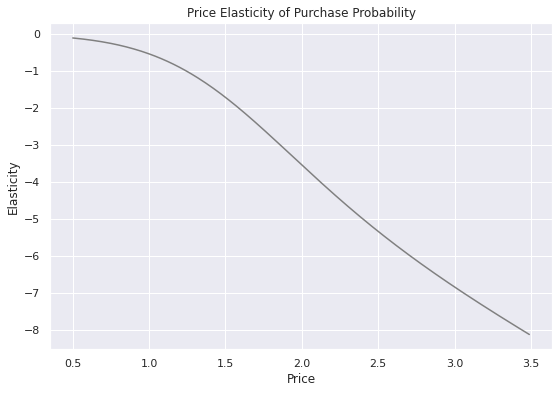

In [13]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [14]:
#Purchase Probability by Segments
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]
Y = df_pa_segment_1['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [15]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model_incidence_segment_1.coef_

array([[-3.63742081]])

In [17]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

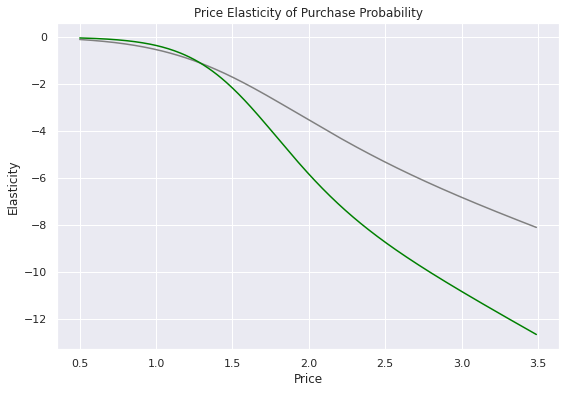

In [18]:
#Results
df_price_elasticities['PE_Segment_1'] = pe_segment_1
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [19]:
#Segment2-Fewer Opportunities
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

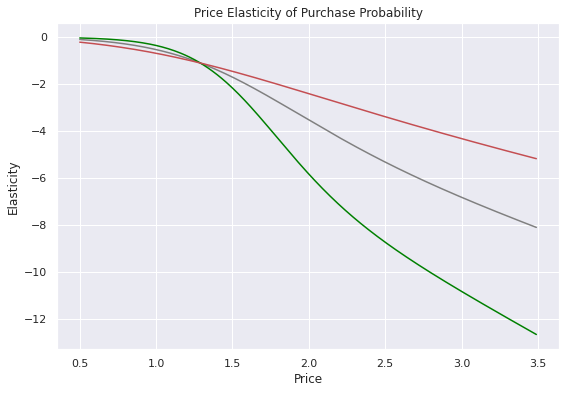

In [20]:

df_price_elasticities['PE_Segment_2'] = pe_segment2
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [21]:
#Segment0
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5

model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

In [22]:
#Segment 3
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096393,-0.168231,-0.031002,-0.209963,-0.235611
1,0.51,-0.100461,-0.173151,-0.032773,-0.216537,-0.242989
2,0.52,-0.104655,-0.178142,-0.034631,-0.223222,-0.250490
3,0.53,-0.108980,-0.183204,-0.036580,-0.230016,-0.258114
4,0.54,-0.113438,-0.188336,-0.038623,-0.236922,-0.265864


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

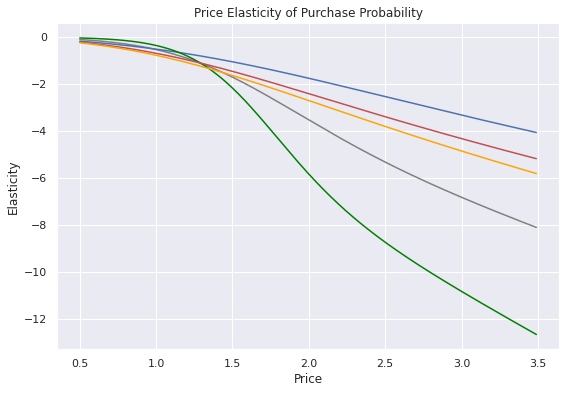

In [23]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [24]:
#Purchase Probability with Promotion Feature
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


In [25]:
#Model Estimation
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49402252,  0.56148094]])

In [26]:
#Price Elasticity with Promotion
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})
df_price_elasticity_promotion['Promotion'] = 1
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096393,-0.168231,-0.031002,-0.209963,-0.235611,-0.125743
1,0.51,-0.100461,-0.173151,-0.032773,-0.216537,-0.242989,-0.129859
2,0.52,-0.104655,-0.178142,-0.034631,-0.223222,-0.250490,-0.134055
3,0.53,-0.108980,-0.183204,-0.036580,-0.230016,-0.258114,-0.138330
4,0.54,-0.113438,-0.188336,-0.038623,-0.236922,-0.265864,-0.142686


In [27]:
#Price Elasticity with No Promotion
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

df_price_elasticity_promotion_no['Promotion'] = 0

Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)
Y_no_promo 



array([[0.26191441, 0.73808559],
       [0.26481284, 0.73518716],
       [0.26773171, 0.73226829],
       [0.27067091, 0.72932909],
       [0.27363032, 0.72636968],
       [0.27660981, 0.72339019],
       [0.27960925, 0.72039075],
       [0.28262852, 0.71737148],
       [0.28566746, 0.71433254],
       [0.28872592, 0.71127408],
       [0.29180375, 0.70819625],
       [0.29490079, 0.70509921],
       [0.29801686, 0.70198314],
       [0.3011518 , 0.6988482 ],
       [0.30430542, 0.69569458],
       [0.30747754, 0.69252246],
       [0.31066795, 0.68933205],
       [0.31387647, 0.68612353],
       [0.31710288, 0.68289712],
       [0.32034697, 0.67965303],
       [0.32360852, 0.67639148],
       [0.32688731, 0.67311269],
       [0.3301831 , 0.6698169 ],
       [0.33349565, 0.66650435],
       [0.33682473, 0.66317527],
       [0.34017008, 0.65982992],
       [0.34353144, 0.65646856],
       [0.34690856, 0.65309144],
       [0.35030116, 0.64969884],
       [0.35370897, 0.64629103],
       [0.

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

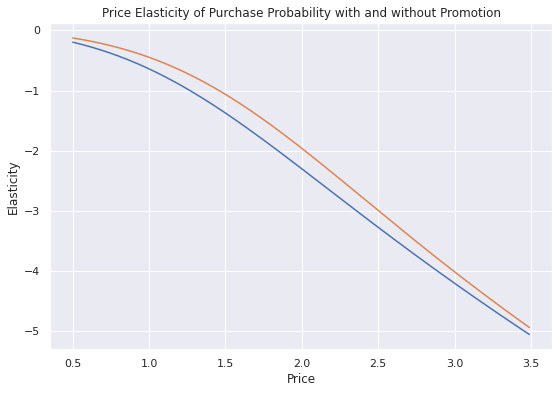

In [28]:
no_promo = Y_no_promo[: , 1]
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')


In [29]:
#brand Choice
#Data Preparation
brand_choice = df_pa[df_pa['Incidence'] == 1]
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,1,0,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,1,0,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,2.18,2.69,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,2.21,2.70,1,1,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,2.24,2.79,1,1,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0


In [30]:
Y = brand_choice['Brand']

brand_choice.columns.values
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [31]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
model_brand_choice.coef_
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915970,0.658454,2.417682,0.704078,-0.202121
1,1.274609,-1.879858,-0.212656,-0.206343,0.587867
2,1.624214,0.562122,0.500957,1.039520,0.452808
3,0.574532,0.395585,-1.400621,-1.246246,0.249347
4,0.442616,0.263696,-1.305362,-0.291010,-1.087902


In [33]:

bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


In [34]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [35]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)
pr_own_brand_5 = predict_brand_5[: ][:, 4]
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [36]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096393,-0.168231,-0.031002,-0.209963,-0.235611,-0.125743,-0.195653,-0.049055
1,0.51,-0.100461,-0.173151,-0.032773,-0.216537,-0.242989,-0.129859,-0.201775,-0.050616
2,0.52,-0.104655,-0.178142,-0.034631,-0.223222,-0.250490,-0.134055,-0.207999,-0.052207
3,0.53,-0.108980,-0.183204,-0.036580,-0.230016,-0.258114,-0.138330,-0.214326,-0.053827
4,0.54,-0.113438,-0.188336,-0.038623,-0.236922,-0.265864,-0.142686,-0.220757,-0.055477
5,0.55,-0.118032,-0.193539,-0.040766,-0.243940,-0.273739,-0.147125,-0.227294,-0.057158
6,0.56,-0.122767,-0.198815,-0.043012,-0.251071,-0.281741,-0.151646,-0.233936,-0.058871
7,0.57,-0.127644,-0.204162,-0.045367,-0.258315,-0.289870,-0.156251,-0.240684,-0.060615
8,0.58,-0.132668,-0.209583,-0.047834,-0.265674,-0.298128,-0.160941,-0.247540,-0.062391
9,0.59,-0.137843,-0.215076,-0.050419,-0.273148,-0.306515,-0.165717,-0.254504,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

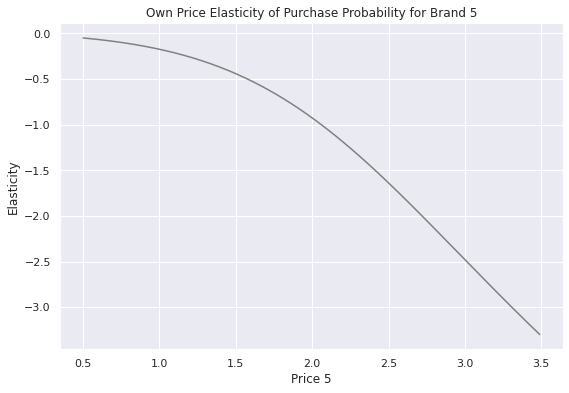

In [37]:

plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

In [38]:
#Cross Price Elasticity 4,5
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [39]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [40]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4
pr_brand_4

array([0.60919513, 0.60674146, 0.60428142, 0.60181511, 0.59934262,
       0.59686405, 0.5943795 , 0.59188909, 0.5893929 , 0.58689104,
       0.58438362, 0.58187074, 0.57935251, 0.57682904, 0.57430044,
       0.57176681, 0.56922827, 0.56668493, 0.5641369 , 0.5615843 ,
       0.55902724, 0.55646584, 0.55390021, 0.55133047, 0.54875673,
       0.54617913, 0.54359777, 0.54101278, 0.53842427, 0.53583238,
       0.53323722, 0.53063891, 0.52803759, 0.52543337, 0.52282638,
       0.52021674, 0.51760459, 0.51499005, 0.51237324, 0.5097543 ,
       0.50713335, 0.50451053, 0.50188595, 0.49925976, 0.49663207,
       0.49400303, 0.49137277, 0.4887414 , 0.48610908, 0.48347592,
       0.48084206, 0.47820763, 0.47557276, 0.4729376 , 0.47030226,
       0.46766688, 0.4650316 , 0.46239655, 0.45976186, 0.45712766,
       0.4544941 , 0.45186129, 0.44922938, 0.44659849, 0.44396876,
       0.44134033, 0.43871332, 0.43608787, 0.4334641 , 0.43084216,
       0.42822217, 0.42560427, 0.42298858, 0.42037524, 0.41776

In [41]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096393,-0.168231,-0.031002,-0.209963,-0.235611,-0.125743,-0.195653,-0.049055,0.332011
1,0.51,-0.100461,-0.173151,-0.032773,-0.216537,-0.242989,-0.129859,-0.201775,-0.050616,0.337288
2,0.52,-0.104655,-0.178142,-0.034631,-0.223222,-0.250490,-0.134055,-0.207999,-0.052207,0.342507
3,0.53,-0.108980,-0.183204,-0.036580,-0.230016,-0.258114,-0.138330,-0.214326,-0.053827,0.347669
4,0.54,-0.113438,-0.188336,-0.038623,-0.236922,-0.265864,-0.142686,-0.220757,-0.055477,0.352773
5,0.55,-0.118032,-0.193539,-0.040766,-0.243940,-0.273739,-0.147125,-0.227294,-0.057158,0.357820
6,0.56,-0.122767,-0.198815,-0.043012,-0.251071,-0.281741,-0.151646,-0.233936,-0.058871,0.362809
7,0.57,-0.127644,-0.204162,-0.045367,-0.258315,-0.289870,-0.156251,-0.240684,-0.060615,0.367741
8,0.58,-0.132668,-0.209583,-0.047834,-0.265674,-0.298128,-0.160941,-0.247540,-0.062391,0.372614
9,0.59,-0.137843,-0.215076,-0.050419,-0.273148,-0.306515,-0.165717,-0.254504,-0.064200,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt to Brand 4')

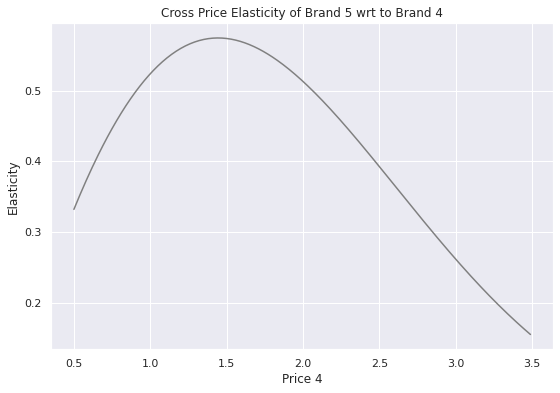

In [42]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')

In [43]:
#Own and Cross Price(Segment)
#Well-off
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
376,200000005,51,1,5,1,0,0,1.35,1.87,1.93,2.09,2.59,1,1,1,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
377,200000005,57,1,5,1,5,1,1.39,1.90,1.91,2.12,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
394,200000005,159,1,5,2,0,0,1.39,1.90,1.94,2.16,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
396,200000005,178,1,5,3,0,0,1.48,1.50,1.99,2.16,2.49,0,0,0,1,1,0,0,49,1,121466,1,2,3,0,0,0,1
410,200000005,249,1,5,1,0,0,1.46,1.89,1.99,2.15,2.65,0,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57586,200000491,690,1,5,2,5,1,1.50,1.87,2.06,2.24,2.78,0,1,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1
57587,200000491,697,1,5,5,5,1,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1
57588,200000491,704,1,5,5,5,1,1.41,1.85,2.01,2.24,2.79,0,0,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1
57589,200000491,714,1,5,1,5,1,1.50,1.80,2.09,2.24,2.79,0,0,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1


In [44]:
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

#coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.38,1.13,1.39,-0.02,-0.11
Price_2,0.73,-1.65,0.05,0.40,0.47
Price_3,1.17,0.21,0.46,-1.71,-0.13
Price_4,0.03,0.65,0.41,-1.08,-0.01
Price_5,-0.00,-0.20,0.34,0.42,-0.55


In [45]:
#Own Brand
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

In [46]:
#Cross Brand
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096393,-0.168231,-0.031002,-0.209963,-0.235611,-0.125743,-0.195653,-0.049055,0.332011,-0.043940,0.194774
1,0.51,-0.100461,-0.173151,-0.032773,-0.216537,-0.242989,-0.129859,-0.201775,-0.050616,0.337288,-0.045027,0.197258
2,0.52,-0.104655,-0.178142,-0.034631,-0.223222,-0.250490,-0.134055,-0.207999,-0.052207,0.342507,-0.046123,0.199692
3,0.53,-0.108980,-0.183204,-0.036580,-0.230016,-0.258114,-0.138330,-0.214326,-0.053827,0.347669,-0.047228,0.202074
4,0.54,-0.113438,-0.188336,-0.038623,-0.236922,-0.265864,-0.142686,-0.220757,-0.055477,0.352773,-0.048343,0.204406
5,0.55,-0.118032,-0.193539,-0.040766,-0.243940,-0.273739,-0.147125,-0.227294,-0.057158,0.357820,-0.049468,0.206688
6,0.56,-0.122767,-0.198815,-0.043012,-0.251071,-0.281741,-0.151646,-0.233936,-0.058871,0.362809,-0.050602,0.208921
7,0.57,-0.127644,-0.204162,-0.045367,-0.258315,-0.289870,-0.156251,-0.240684,-0.060615,0.367741,-0.051745,0.211104
8,0.58,-0.132668,-0.209583,-0.047834,-0.265674,-0.298128,-0.160941,-0.247540,-0.062391,0.372614,-0.052898,0.213238
9,0.59,-0.137843,-0.215076,-0.050419,-0.273148,-0.306515,-0.165717,-0.254504,-0.064200,0.377430,-0.054062,0.215324


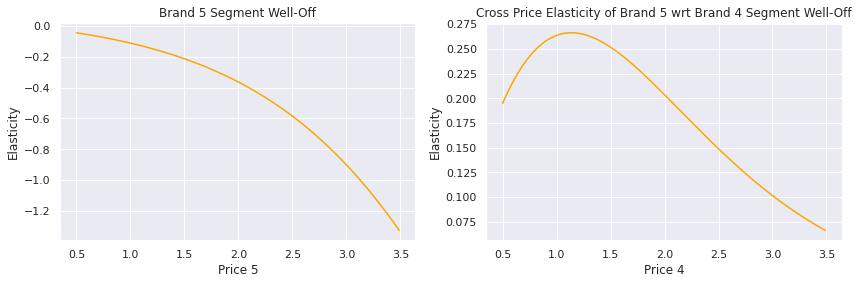

In [47]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

In [48]:
#Standard
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,1,1,52,2,159052,2,1,0,1,0,0,0
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,2.14,2.64,0,0,0,0,0,1,1,52,2,159052,2,1,0,1,0,0,0
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,2.03,2.68,1,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,2.21,2.65,0,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0


In [49]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [50]:
#Own Brand
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

In [51]:
#Cross Brand
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

In [52]:
#Career Focused
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [53]:
#Own Brand

df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

#Cross Brand
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

In [54]:
#Fewer Opportunities
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [55]:
#Own Brand

df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

In [56]:
#Cross Brand

df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096393,-0.168231,-0.031002,-0.209963,-0.235611,-0.125743,-0.195653,-0.049055,0.332011,-0.297683,0.482433,-0.001034,0.187011,-0.116308,0.160500,-0.043940,0.194774
1,0.51,-0.100461,-0.173151,-0.032773,-0.216537,-0.242989,-0.129859,-0.201775,-0.050616,0.337288,-0.303732,0.491738,-0.001096,0.189374,-0.119357,0.162450,-0.045027,0.197258
2,0.52,-0.104655,-0.178142,-0.034631,-0.223222,-0.250490,-0.134055,-0.207999,-0.052207,0.342507,-0.309792,0.501028,-0.001160,0.191686,-0.122440,0.164355,-0.046123,0.199692
3,0.53,-0.108980,-0.183204,-0.036580,-0.230016,-0.258114,-0.138330,-0.214326,-0.053827,0.347669,-0.315862,0.510302,-0.001228,0.193947,-0.125559,0.166215,-0.047228,0.202074
4,0.54,-0.113438,-0.188336,-0.038623,-0.236922,-0.265864,-0.142686,-0.220757,-0.055477,0.352773,-0.321943,0.519560,-0.001300,0.196159,-0.128714,0.168030,-0.048343,0.204406
5,0.55,-0.118032,-0.193539,-0.040766,-0.243940,-0.273739,-0.147125,-0.227294,-0.057158,0.357820,-0.328035,0.528802,-0.001375,0.198320,-0.131904,0.169802,-0.049468,0.206688
6,0.56,-0.122767,-0.198815,-0.043012,-0.251071,-0.281741,-0.151646,-0.233936,-0.058871,0.362809,-0.334140,0.538028,-0.001455,0.200431,-0.135132,0.171529,-0.050602,0.208921
7,0.57,-0.127644,-0.204162,-0.045367,-0.258315,-0.289870,-0.156251,-0.240684,-0.060615,0.367741,-0.340256,0.547238,-0.001538,0.202493,-0.138396,0.173212,-0.051745,0.211104
8,0.58,-0.132668,-0.209583,-0.047834,-0.265674,-0.298128,-0.160941,-0.247540,-0.062391,0.372614,-0.346385,0.556432,-0.001626,0.204506,-0.141698,0.174853,-0.052898,0.213238
9,0.59,-0.137843,-0.215076,-0.050419,-0.273148,-0.306515,-0.165717,-0.254504,-0.064200,0.377430,-0.352526,0.565609,-0.001718,0.206469,-0.145039,0.176450,-0.054062,0.215324


Text(0.5, 0, 'Price 4')

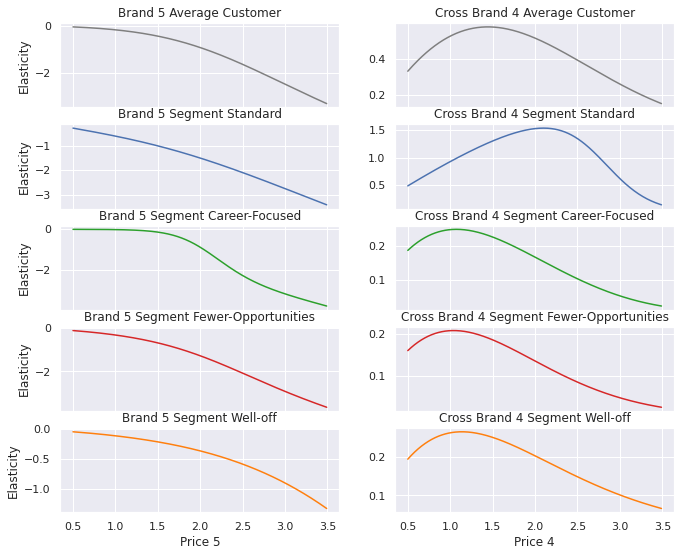

In [57]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

In [58]:
#Price Elasticity of Purchase Quantity
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,1,0,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,1,0,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,1,0,1,0,0


In [59]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
# The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15 
# and has an average value of 2.8, which means that more often than not our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,2.654296,0.372455,0.349638,0.043858,0.128091,0.045430,0.357289,0.385162,40.346905,1.151045,126706.452043,0.845471,0.797513,1.543244,0.231657,0.292731,0.176322,0.299290,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,0.097724,0.483475,0.476872,0.204787,0.334203,0.208252,0.479217,0.486650,12.346284,0.634625,39935.109358,0.633840,0.810358,1.144602,0.421906,0.455032,0.381107,0.457962,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,2.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,2.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,102723.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000,122895.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,2.700000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,49.000000,2.000000,147967.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [61]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

In [62]:
#Model Estimation-Linear Regression
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [63]:
Y = df_purchase_quantity['Quantity']
Y.head()
model_quantity = LinearRegression()
model_quantity.fit(X, Y)
model_quantity.coef_

array([-0.8173651 , -0.10504673])

In [64]:
#Price Elasticity with Promotion
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684991

In [65]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [66]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [67]:

df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096393,-0.168231,-0.031002,-0.209963,-0.235611,-0.125743,-0.195653,-0.049055,0.332011,-0.297683,0.482433,-0.001034,0.187011,-0.116308,0.160500,-0.043940,0.194774,-0.102157
1,0.51,-0.100461,-0.173151,-0.032773,-0.216537,-0.242989,-0.129859,-0.201775,-0.050616,0.337288,-0.303732,0.491738,-0.001096,0.189374,-0.119357,0.162450,-0.045027,0.197258,-0.104413
2,0.52,-0.104655,-0.178142,-0.034631,-0.223222,-0.250490,-0.134055,-0.207999,-0.052207,0.342507,-0.309792,0.501028,-0.001160,0.191686,-0.122440,0.164355,-0.046123,0.199692,-0.106679
3,0.53,-0.108980,-0.183204,-0.036580,-0.230016,-0.258114,-0.138330,-0.214326,-0.053827,0.347669,-0.315862,0.510302,-0.001228,0.193947,-0.125559,0.166215,-0.047228,0.202074,-0.108954
4,0.54,-0.113438,-0.188336,-0.038623,-0.236922,-0.265864,-0.142686,-0.220757,-0.055477,0.352773,-0.321943,0.519560,-0.001300,0.196159,-0.128714,0.168030,-0.048343,0.204406,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.011809,-4.004107,-12.533296,-5.112868,-5.737440,-4.861637,-4.983233,-3.231574,0.162233,-3.336914,0.157796,-3.746031,0.022975,-3.592239,0.024301,-1.287427,0.068591,-1.774292
296,3.46,-8.037057,-4.018917,-12.570190,-5.129895,-5.756547,-4.879839,-5.000139,-3.247768,0.160333,-3.350239,0.152368,-3.757475,0.022522,-3.606120,0.023940,-1.297236,0.067968,-1.788634
297,3.47,-8.062270,-4.033712,-12.607067,-5.146903,-5.775633,-4.898010,-5.017025,-3.263930,0.158447,-3.363561,0.147106,-3.768899,0.022076,-3.619957,0.023583,-1.307100,0.067350,-1.803124
298,3.48,-8.087449,-4.048491,-12.643927,-5.163892,-5.794697,-4.916150,-5.033892,-3.280059,0.156575,-3.376880,0.142005,-3.780303,0.021638,-3.633751,0.023231,-1.317020,0.066736,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

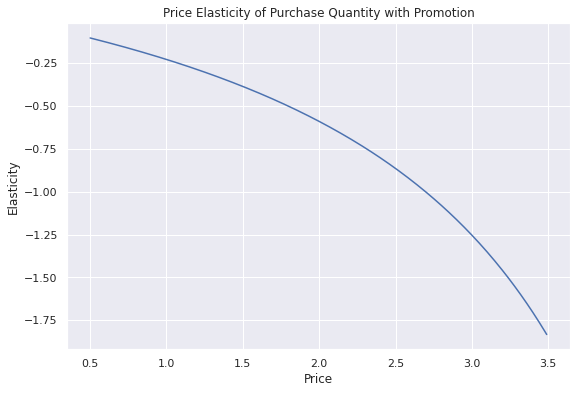

In [68]:

plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

In [69]:
#Price Elasticity with No Promotion
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096393,-0.168231,-0.031002,-0.209963,-0.235611,-0.125743,-0.195653,-0.049055,0.332011,-0.297683,0.482433,-0.001034,0.187011,-0.116308,0.160500,-0.043940,0.194774,-0.102157,-0.099543
1,0.51,-0.100461,-0.173151,-0.032773,-0.216537,-0.242989,-0.129859,-0.201775,-0.050616,0.337288,-0.303732,0.491738,-0.001096,0.189374,-0.119357,0.162450,-0.045027,0.197258,-0.104413,-0.101736
2,0.52,-0.104655,-0.178142,-0.034631,-0.223222,-0.250490,-0.134055,-0.207999,-0.052207,0.342507,-0.309792,0.501028,-0.001160,0.191686,-0.122440,0.164355,-0.046123,0.199692,-0.106679,-0.103939
3,0.53,-0.108980,-0.183204,-0.036580,-0.230016,-0.258114,-0.138330,-0.214326,-0.053827,0.347669,-0.315862,0.510302,-0.001228,0.193947,-0.125559,0.166215,-0.047228,0.202074,-0.108954,-0.106150
4,0.54,-0.113438,-0.188336,-0.038623,-0.236922,-0.265864,-0.142686,-0.220757,-0.055477,0.352773,-0.321943,0.519560,-0.001300,0.196159,-0.128714,0.168030,-0.048343,0.204406,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.011809,-4.004107,-12.533296,-5.112868,-5.737440,-4.861637,-4.983233,-3.231574,0.162233,-3.336914,0.157796,-3.746031,0.022975,-3.592239,0.024301,-1.287427,0.068591,-1.774292,-1.664290
296,3.46,-8.037057,-4.018917,-12.570190,-5.129895,-5.756547,-4.879839,-5.000139,-3.247768,0.160333,-3.350239,0.152368,-3.757475,0.022522,-3.606120,0.023940,-1.297236,0.067968,-1.788634,-1.677205
297,3.47,-8.062270,-4.033712,-12.607067,-5.146903,-5.775633,-4.898010,-5.017025,-3.263930,0.158447,-3.363561,0.147106,-3.768899,0.022076,-3.619957,0.023583,-1.307100,0.067350,-1.803124,-1.690246
298,3.48,-8.087449,-4.048491,-12.643927,-5.163892,-5.794697,-4.916150,-5.033892,-3.280059,0.156575,-3.376880,0.142005,-3.780303,0.021638,-3.633751,0.023231,-1.317020,0.066736,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

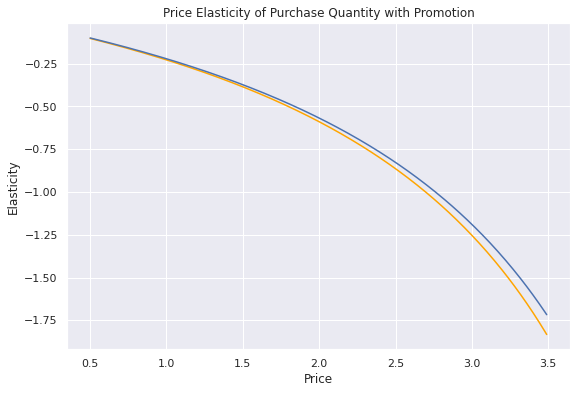

In [70]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')